<a href="https://colab.research.google.com/github/fabiorfc/Projeto-Alura-DataScience/blob/master/projeto_alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Importando as libraries necessarias

In [0]:
#@title Library para trabalhar com dataframes
import pandas as pd

In [0]:
#@title Librarires para gerar gráficos
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
#@title Library para trabalhar com álgebra linear
import numpy as np

In [0]:
#@title library de testes estatísticos
from scipy.stats import normaltest,ranksums

# 2) Importando os dados

In [0]:
link_para_os_dados = "https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv"
link_para_os_dados2 = "https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv"
movies = pd.read_csv(link_para_os_dados)
ratings = pd.read_csv(link_para_os_dados2)


# 3) Verificando o conteúdo dos dados

In [264]:
#@title Verificando as colunas da base Movies
pd.DataFrame({"Base Movies":movies.columns})

,Base Movies
0,movieId
1,title
2,genres


In [265]:
#@title Top 5 da base Movies
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [266]:
#@title Dimensão da base
dimensao = movies.shape
print("A base de filmes possui: {} Linhas e {} colunas".format(dimensao[0], dimensao[1]))

A base de filmes possui: 9742 Linhas e 3 colunas


In [267]:
#@title Verificando as colunas da base Ratings
pd.DataFrame({"Base Ratings": ratings.columns})

,Base Ratings
0,userId
1,movieId
2,rating
3,timestamp


In [268]:
#@title Top 5 da base Movies
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [269]:
#@title Dimensao da base ratings
dimensoes = ratings.shape
print("A base ratings possui {} avaliaçoes e {} colunas".format(dimensoes[0], dimensoes[1]))

A base ratings possui 100836 avaliaçoes e 4 colunas


# 4) Preparação da base para as análises

In [270]:
#@title Combinando as bases e gerando um nova tabela com a quantidade de avaliações para cada filme

# Alterando o índice da base movies
#movies_indexados = movies.set_index("movieId")
#ratings_indexados = ratings.set_index("movieId")
# Criando uma tabela com a contagem ratings
ratings_agrupados = ratings_indexados.groupby("movieId").count()
# Unindo as duas tabelas
tabela_final = pd.merge(movies, ratings_agrupados, left_on="movieId", right_on="movieId", how="left")
tabela_final["qtd_avaliacoes"] = tabela_final["userId"] # Aqui os userId Estão sumarizados (Cada linha de filmes contem a contagem de votos)
tabela_final = tabela_final.drop(columns=["rating","timestamp","userId"])
# Verificando as base final
tabela_final.head()

,movieId,title,genres,qtd_avaliacoes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
4,5,Father of the Bride Part II (1995),Comedy,49.0


In [271]:
#@title Avaliando se existem filmes que não foram avaliados

# Cálculo da quantidade de filmes não avaliados e total
qtde_filmes_nao_avaliados = sum(tabela_final["qtd_avaliacoes"].isna())
total_de_filmes = len(movies)

# Gerando os resultados
print("Não foram avaliados {} de {} filmes".format(qtde_filmes_nao_avaliados,total_de_filmes))

tabela_final[tabela_final["qtd_avaliacoes"].isna()].head(10)

Não foram avaliados 18 de 9742 filmes


,movieId,title,genres,qtd_avaliacoes
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


**Análise**


---



Como existem filmes que não foram votados, iremos excluí-los da análise

In [272]:
#@title Combinando novamente a base, via 'inner' join, para retirar os filmes que nao foram votados

# Alterando o índice da base movies
#movies_indexados = movies.set_index("movieId")
#ratings_indexados = ratings.set_index("movieId")
# Criando uma tabela com a contagem ratings
#ratings_agrupados = ratings_indexados.groupby("movieId").count()
# Unindo as duas tabelas
tabela_final = pd.merge(movies, ratings_agrupados, left_on="movieId", right_on="movieId", how="inner")
tabela_final["qtd_avaliacoes"] = tabela_final["userId"] # Aqui os userId Estão sumarizados (Cada linha de filmes contem a contagem de votos)
tabela_final = tabela_final.drop(columns=["rating","timestamp","userId"])

# Checagem da quantidade de filmes da base
numero_de_filmes_avaliados = tabela_final["movieId"].drop_duplicates().count()
print("Foram analisados {} de {} filmes".format(numero_de_filmes_avaliados, total_de_filmes))

# Verificando a base final
tabela_final.head()

Foram analisados 9724 de 9742 filmes


,movieId,title,genres,qtd_avaliacoes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,110
2,3,Grumpier Old Men (1995),Comedy|Romance,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7
4,5,Father of the Bride Part II (1995),Comedy,49


In [273]:
#@title Avaliando as estatísticas descritivas dos dados de quantidade de avaliações
media = round(tabela_final["qtd_avaliacoes"].mean(),1)
mediana = round(tabela_final["qtd_avaliacoes"].quantile(0.5))
quartil_01 = round(tabela_final["qtd_avaliacoes"].quantile(0.25))
quartil_03 = round(tabela_final["qtd_avaliacoes"].quantile(0.75))
percentil_95 = round(tabela_final["qtd_avaliacoes"].quantile(0.95))
percentil_05 = round(tabela_final["qtd_avaliacoes"].quantile(0.05))
coeficiente_de_variacao = tabela_final["qtd_avaliacoes"].std()/tabela_final["qtd_avaliacoes"].mean()
coeficiente_de_variacao = round(coeficiente_de_variacao*100,2)

print("-------------------------------------------------------------------------")
print("Percentil 05: {}".format(percentil_05))
print("percentil 25: {}".format(quartil_01))
print("Mediana: {}".format(mediana))
print("Média: {}".format(media))
print("Percentil 75 : {}".format(quartil_03))
print("Percentil 95: {}".format(percentil_95))
print("Coeficiente de variação: {}%".format(coeficiente_de_variacao))

-------------------------------------------------------------------------
Percentil 05: 1
percentil 25: 1
Mediana: 3
Média: 10.4
Percentil 75 : 9
Percentil 95: 47
Coeficiente de variação: 216.02%


**Análise**


---



Conforme pode-se verificar a Média e a Mediana apresentam valores bem discrepantes. Isso se deve à alta variabilidade dos dados, a qual pode ser mensurada pelo coeficiente de variação de valor igual a 216%.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0.5, 1.0, 'Boxplot de Avaliações de filmes')

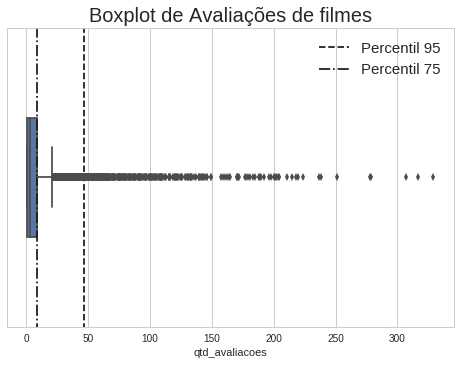

In [274]:
#@title Boxplot das avaliações dos filmes

ax = sns.boxplot(tabela_final["qtd_avaliacoes"], width=0.4)
linha_1 = plt.vlines(x = percentil_95, ymin = -1, ymax = 1, linestyles = {"dashed"}, label = "Percentil 95")
linha_2 = plt.vlines(x = quartil_03, ymin = -1, ymax = 1, linestyles = {"dashdot"}, label = "Percentil 75")
plt.legend(handles = [linha_1,linha_2], fontsize = 15, shadow=True)
plt.title("Boxplot de Avaliações de filmes", size = 20)

**Análise**

---

Observando o boxplot, percebe-se que poucos filmes tiveram um número de avaliações muito alto, quando comparados à grande maioria.

A partir dessa avaliação, podem-se considerar algumas questões:

**Por que existe uma pequena parcela filmes que possuem um número de avaliações muito acima da grande maioria?**

**Seria por conta do gênero?**

**Seria o impacto que esses filmes causaram no público?**

---
Vamos avaliar essas questões a partir das seguintes hipóteses:

1. A maior quantidade de avaliações ocorreu devido à satisfação dos usuários com relação ao filme? Se isso for verdade, então a nota dos 25% dos filmes mais votados deve ser maior.

2. O maior engajamento dos filmes ocorre para gêneros específicos? Se isso é verdade, então a distribuição dos gêneros dos filmes mais votados deve ser diferente dos gêneros menos votados



---




# 5) Avaliação das notas dos 25% dos filmes com mais avaliações

In [275]:
#@ title Selecionando os 25% dos filmes mais votados
filtro_filmes_mais_votados = tabela_final["qtd_avaliacoes"] >= tabela_final["qtd_avaliacoes"].quantile(0.75)
tabela_final_filtrada = tabela_final[filtro_filmes_mais_votados]

# Selecionando os filmes mais votados da tabela de Ratings
indices_dos_filmes_mais_votados = tabela_final_filtrada["movieId"]
segundo_filtro_filmes_mais_votados = ratings["movieId"].isin(indices_dos_filmes_mais_votados)
filmes_mais_votados = ratings[segundo_filtro_filmes_mais_votados]

# Unindo as tabelas de Filmes mais votados com a tabela Movies (Para unir as avaliações com os nomes dos filmes)
tabela_final_filmes_mais_votados = pd.merge(filmes_mais_votados, movies, left_on="movieId", right_on="movieId", how = "left")

# Verificando os resultados finais
qtde_filmes_mais_votados = tabela_final_filmes_mais_votados["movieId"].drop_duplicates().count()
print("Dos {} filmes avaliados, {} foram os 25% mais votados".format(numero_de_filmes_avaliados, qtde_filmes_mais_votados))
tabela_final_filmes_mais_votados.head()

Dos 9724 filmes avaliados, 2441 foram os 25% mais votados


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


**Análise**


---


Inicialmente, vamos testar a hipótese de que o maior engajamento por parte dos avaliadores ocorreu devido à qualidade do filmes. Para isso, vamos avaliar se a notas dos 25% dos filmes mais votados deverá ser maior do que a nota dos demais.

Para realizar este teste, vamos primeiramente verificar se as notas dos filmes mais votados é normalmente distribuída.

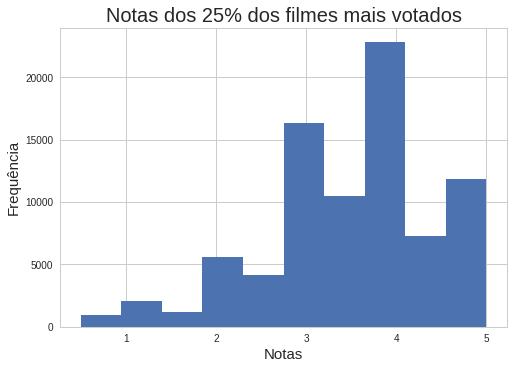

In [276]:
#@title Verificando a normalidade dos dados
plt.hist(tabela_final_filmes_mais_votados["rating"], bins = 10)
plt.title("Notas dos 25% dos filmes mais votados", size = 20)
plt.xlabel("Notas", size = 15)
plt.ylabel("Frequência", size = 15)
plt.show()

**Análise**


---


A partir do histograma, percebe-se que existe uma assimetria à esquerda e, a variação da frequência ao longo das notas é uma evidência de que os dados podem não ter distribuição normal.

In [277]:
#@title Teste numérico de normalidade
stat, p = normaltest(tabela_final_filmes_mais_votados["rating"])
print("p-valor: {}".format(round(p,3)))
print("Estatística do teste: {}".format(round(stat)))

p-valor: 0.0
Estatística do teste: 5359.0


**Análise**


---


Com base no p-value, deve-se descartar a hipótese de que as nostas possuem distribuição normal.

A partir das conclusões anteriores, a alternativa que nos resta para testar as médias das notas é o teste não-paramétrico de Wilcoxon.



---

**Teste de Wilcoxson**


O teste estatístico de Wilcoxon avalia se duas amostras provém da mesma distribuição. Se o resultado do teste indicar que as amostras não provém da mesma distribuição, vamos comparar as médias e medianas dos grupos para avaliar qual é a maior.

In [278]:
#@title Separando os dados dos 75% dos filmes menos votados
filtro_filmes_menos_votados = tabela_final["qtd_avaliacoes"] < tabela_final["qtd_avaliacoes"].quantile(0.75)
filmes_menos_votados = tabela_final[filtro_filmes_menos_votados]

# Selecionando os filmes menos votados da tabela de Ratings
indices_dos_filmes_menos_votados = filmes_menos_votados["movieId"]
segundo_filtro_filmes_menos_votados = ratings["movieId"].isin(indices_dos_filmes_menos_votados)
filmes_menos_votados_final = ratings[segundo_filtro_filmes_menos_votados]

# Unindo as tabelas de Filmes mais votados com a tabela Movies (Para unir as avaliações com os nomes dos filmes)
tabela_final_filmes_menos_votados = pd.merge(filmes_menos_votados_final, movies, left_on="movieId", right_on="movieId", how = "inner")

# Avaliando o resultado da filtragem
qtde_filmes_menos_votados = tabela_final_filmes_menos_votados["movieId"].drop_duplicates().count()
print("-----------------------------------------------------------------------")
print("Foram selecionados {} de {} filmes".format(qtde_filmes_menos_votados, numero_de_filmes_avaliados))
print("Ao todos, são {} filmes mais votados, {} menos votados, somando um total de {} filmes".format(qtde_filmes_mais_votados, qtde_filmes_menos_votados, numero_de_filmes_avaliados))
print("-----------------------------------------------------------------------")

# Tabela final de filmes menos votados
tabela_final_filmes_menos_votados.head(10)


-----------------------------------------------------------------------
Foram selecionados 7283 de 9724 filmes
Ao todos, são 2441 filmes mais votados, 7283 menos votados, somando um total de 9724 filmes
-----------------------------------------------------------------------


,userId,movieId,rating,timestamp,title,genres
0,1,804,4.0,964980499,She's the One (1996),Comedy|Romance
1,51,804,5.0,1230931511,She's the One (1996),Comedy|Romance
2,113,804,3.0,980051922,She's the One (1996),Comedy|Romance
3,117,804,3.0,844163929,She's the One (1996),Comedy|Romance
4,414,804,3.0,961439308,She's the One (1996),Comedy|Romance
5,489,804,2.0,1333831977,She's the One (1996),Comedy|Romance
6,555,804,4.0,978744726,She's the One (1996),Comedy|Romance
7,603,804,2.0,963178746,She's the One (1996),Comedy|Romance
8,1,940,5.0,964982176,"Adventures of Robin Hood, The (1938)",Action|Adventure|Romance
9,57,940,4.0,969753691,"Adventures of Robin Hood, The (1938)",Action|Adventure|Romance


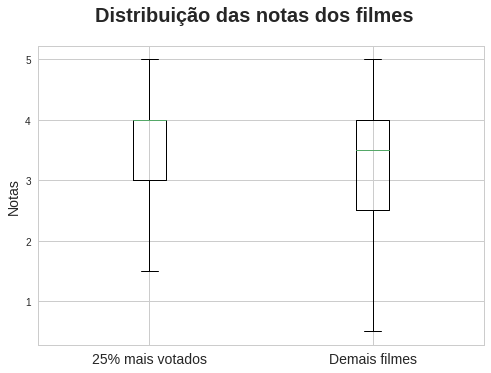

In [279]:

notas_dos_filmes_mais_votados = tabela_final_filmes_mais_votados["rating"]
notas_dos_filmes_menos_votados = tabela_final_filmes_menos_votados["rating"]

plt.boxplot([notas_dos_filmes_mais_votados, notas_dos_filmes_menos_votados])
plt.suptitle("Distribuição das notas dos filmes", fontweight='bold', size = 20)
plt.ylabel("Notas", size = 14)
plt.xticks([1,2],["25% mais votados","Demais filmes"], size = 14)
plt.show()

In [280]:
#@title Teste de Wilcoxon para comparação das amostras
estatistica, p = ranksums(notas_dos_filmes_mais_votados, notas_dos_filmes_menos_votados)
print("p-valor: {}".format(round(p,2)))
print("estatistica: {}".format(round(estatistica,2)))

p-valor: 0.0
estatistica: 41.15


**Análise**


---


A partir do p-valor gerado pelo teste de Wilcoxon pode-se rejeitar a hipótese de igualdade das amostras.

O próprio boxplot já mostra a diferença entre os dois conjuntos de dados. É possível verificar por meio do gráfico que a maioria das notas dos 25% dos filmes mais avaliados está entre 3 e 4, enquanto que no outro conjunto de filmes, a variação é maior, indo de 2,5 à 4.

Para ter uma ideia melhor de como os dados estão distribuidos, vamos avaliar as estatísticas de posição e dispersão de ambos os conjuntos.

In [281]:
#@title Estatísticas descritivas de ambos os conjunto de dados
metricas = {'Filmes mais votados':[
    notas_dos_filmes_mais_votados.quantile(0.5),
    round(notas_dos_filmes_mais_votados.mean(),2),
    round(notas_dos_filmes_mais_votados.std(),2),
    round(notas_dos_filmes_mais_votados.std()/notas_dos_filmes_mais_votados.mean(),2)],
    'Filmes menos votados':[notas_dos_filmes_mais_votados.quantile(0.5),
    round(notas_dos_filmes_menos_votados.mean(),2),
    round(notas_dos_filmes_menos_votados.std(),2),
    round(notas_dos_filmes_menos_votados.std()/notas_dos_filmes_menos_votados.mean(),2)]}

# Gerando as estatísticas descritivas
tabela_metricas = pd.DataFrame(metricas)
tabela_metricas = tabela_metricas.rename(index={0:'Média',1:'Mediana',2:'Desvio Padrão',3:'Coeficiente de variação'})
tabela_metricas



,Filmes mais votados,Filmes menos votados
Média,4.00,4.00
Mediana,3.57,3.20
Desvio Padrão,1.02,1.09
Coeficiente de variação,0.29,0.34


**Análise**


---


Apesar do teste de Wilcoxon ter apresentado evidências de que os dados apresentam diferenças entre suas distribuições, percebe-se a partir da tabela de estatísticas descritivas, que suas medidas de posição e dispersão estão muito próximas umas das outras. As diferenças estão nos valores das medianas e de coeficiente de variação. 

Os filmes mais votados possuem nota mediana superior aos menos votados e menor variabilidade. 

Entretando, para avaliadores mais conservadores, mesmo que o teste estatístico aponte a diferença e a mediana dos filmes mais novos seja superior, talvez essas análises não sejam suficientes. Além disso, os tamanhos das amostras é um fator que pode ter influenciado no teste, pois em muitas bibliografias, o teste de Wilcoxon é conhecido como teste para amostras pareadas.

Portanto, para encerrar esse tópico da análise, colocarei como inconclusiva a hipótese de que os filmes com maior engajamento do público são também os que possuem maiores notas.

Vamos agora, para a próxima hipótese de que os filmes mais votados são de gêneros específicos.

# 6) O Genero dos filmes mais queridos pela audiência

**Análise**


---


Para fazer a avaliação dos gêneros mais frequêntes em cada filmes, primeiramente serão extraídos as colunas de filmes e gêneros. Depois disso iremos passar uma função para tirar a duplicidade dos dados gerado pela ocorrência de notas dos usuários que votaram

In [282]:
#@title Preparando a base de gêneros dos filmes mais votados

# Extraindo as colunas MovieId, Title e genres
filmes_mais_votados = tabela_final_filmes_mais_votados[["movieId","title","genres"]]
filmes_mais_votados = tabela_final_filmes_mais_votados.drop_duplicates(subset="movieId")

# Checagem dos resultados
print("Quantidade de filmes mais votados: {}".format(len(filmes_mais_votados)))
print("Proporção de filmes mais votados: {}%".format(round(100*len(filmes_mais_votados)/numero_de_filmes_avaliados,2)))
filmes_mais_votados.head()


Quantidade de filmes mais votados: 2441
Proporção de filmes mais votados: 25.1%


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [283]:
#@title  Preparando a base de gêneros dos filmes menos votados

# Extraindo as collunas de interesse
filmes_menos_votados = tabela_final_filmes_menos_votados[["movieId","title","genres"]]
# Tirando os valores duplicados
filmes_menos_votados = filmes_menos_votados.drop_duplicates(subset = "movieId")

# Checagem dos resultados
print("Quantidade de filmes mais votados: {}".format(len(filmes_menos_votados)))
print("Proporção de filmes mais votados: {}%".format(round(100*len(filmes_menos_votados)/numero_de_filmes_avaliados,2)))
filmes_menos_votados.head()

Quantidade de filmes mais votados: 7283
Proporção de filmes mais votados: 74.9%


,movieId,title,genres
0,804,She's the One (1996),Comedy|Romance
8,940,"Adventures of Robin Hood, The (1938)",Action|Adventure|Romance
16,943,"Ghost and Mrs. Muir, The (1947)",Drama|Fantasy|Romance
23,1024,"Three Caballeros, The (1945)",Animation|Children|Musical
29,1226,"Quiet Man, The (1952)",Drama|Romance


In [284]:
#@title Preparando a tabela para a sumarização de todos os gêneros
todos_os_generos = movies["genres"].str.get_dummies()
todos_os_generos = todos_os_generos.sum(axis=0)
todos_os_generos = todos_os_generos.reset_index()
todos_os_generos.columns = ["Gêneros", "Freq. Total"]
todos_os_generos.head()

,Gêneros,Freq. Total
0,(no genres listed),34
1,Action,1828
2,Adventure,1263
3,Animation,611
4,Children,664


In [285]:
#@title Contagem dos gêneros dos filmes mais votados
# Transformando os gêneros em dummies
generos_filmes_mais_votados = filmes_mais_votados["genres"].str.get_dummies()

# Somando os gêneros dos filmes mais votados
soma_filmes_mais_votados = generos_filmes_mais_votados.sum(axis=0)
soma_filmes_mais_votados = pd.DataFrame({'Gêneros':soma_filmes_mais_votados})
soma_filmes_mais_votados = soma_filmes_mais_votados.sort_values(by=['Gêneros'], ascending = False)
soma_filmes_mais_votados

# Concatenando os valores na tabela geral
todos_os_generos_v2 = pd.merge(todos_os_generos, soma_filmes_mais_votados, left_on = "Gêneros", right_index=True, how="left")
todos_os_generos_v2.columns = ["Gêneros", "Total", "Mais votados"]
todos_os_generos_v2.head()

# Substituindo os valores Nan por zeros
todos_os_generos_v3 = todos_os_generos_v2.fillna(0)
todos_os_generos_v3.head()

,Gêneros,Total,Mais votados
0,(no genres listed),34,0.0
1,Action,1828,693.0
2,Adventure,1263,523.0
3,Animation,611,164.0
4,Children,664,226.0


In [286]:
#@title Adicionando as colunas de frequência relativa
todos_os_generos_v3["% Mais Votados"] = round(todos_os_generos_v3["Mais votados"] / todos_os_generos_v3["Total"],3)
todos_os_generos_v3["% Total"] = todos_os_generos_v3["Total"] / todos_os_generos_v3["Total"]
todos_os_generos_v3 = todos_os_generos_v3.sort_values(by = "% Mais Votados", ascending = False)
todos_os_generos_v3

,Gêneros,Total,Mais votados,% Mais Votados,% Total
12,IMAX,158,93.0,0.589,1.0
2,Adventure,1263,523.0,0.414,1.0
16,Sci-Fi,980,376.0,0.384,1.0
1,Action,1828,693.0,0.379,1.0
9,Fantasy,779,281.0,0.361,1.0
4,Children,664,226.0,0.340,1.0
17,Thriller,1894,636.0,0.336,1.0
14,Mystery,573,187.0,0.326,1.0
6,Crime,1199,359.0,0.299,1.0
13,Musical,334,99.0,0.296,1.0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


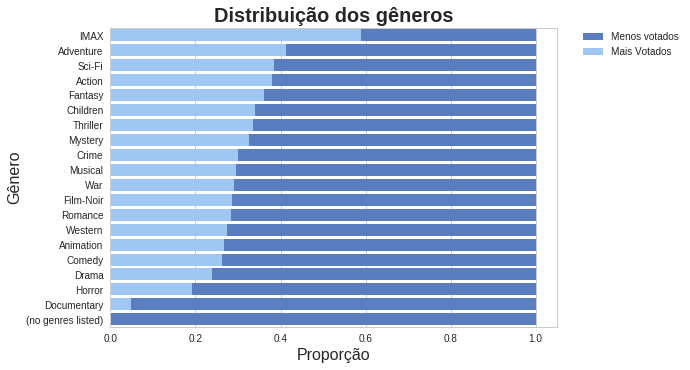

In [287]:
#Plotando o gráfico
#f, ax = plt.subplots(figsize=(15, 5))

sns.set_color_codes("muted")
sns.barplot(y = "Gêneros", x = "% Total", data = todos_os_generos_v3,
            label="Menos votados", color="b")


sns.set(style="whitegrid")
sns.set_color_codes("pastel")
sns.barplot(y = "Gêneros", x = "% Mais Votados", data = todos_os_generos_v3, 
            label="Mais Votados",color = "b")


plt.title("Distribuição dos gêneros", fontweight='bold', size = 20)
plt.xlabel("Proporção", size = 16)
plt.ylabel("Gênero", size = 16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


**Análise**


---

Com base no gráfico de barras, verifica-se que quase 60% dos filmes mais votados são IMAX. Além disso, nota-se que os Gênros Documentário, Horror e Drama apresentam o menor número de engajamento.

Logo, percebe-se que o gênero é um fator que parece influenciar muito no engajamento dos avaliadores dos filmes.

# Conclusão


---


1. Os filmes mais votados possuem maiores notas?

Conforme foi verificado, esse argumento não é necessariamente verdadeiro, apesar dos 25% dos filmes mais votados apresentarem valor de mediana superior aos demais. 

Conforme vimos, o teste de Wilcoxon gerou evidências de que os filmes mais votados apresentam notas distintas dos demais. Entranto, quando avaliamos o Boxplot dos valores e as estatísticas de posição e dispersão, não verifica-se muita diferença.

Talvez o fato de haver grupos de tamanhos diferentes, pode ter influenciado o resultado final do teste.

Sendo assim, essa hipótese foi inconclusiva.


---

2. O maior engajamento dos filmes ocorre para gêneros específicos?

Conforme vimos na tabela e no gráfico de barras, com as frequências relativas, nota-se que os filmes com maior engajamento são IMAX. Além disso, aqueles com menor engajamento, ou não apresentam Gênero, ou são Documentário, Horror ou Drama.

A partir dessas envidências, parece que o Gênero do filmes influencia sim no nível de engajamento dos avaliadores.

Poderíamos aplicar teste de hipótese para a proporção para dar continuidade a discussão, mas o estudo ficaria longo demais. Logo encerraremos por aqui.
